In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
import numpy as np
import seaborn as sns
import matplotlib
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import copy
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

## Data Exploration


In [2]:
data = pd.read_pickle("../datasets/20kSongs_with_countries.pickle")

,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_mbtags,...,tatums_confidence,tatums_start,tempo,time_signature,time_signature_confidence,title,track_7digitalid,track_id,year,artist_country_code
0,22050,27724,0.559823,0.391484,ARE93YV1187B9937CC,7.36529,Cameroon,12.34344,bc30924c-1900-41c3-9a97-41a93433836f,"[world, folk]",...,"[0.455, 0.435, 0.4, 0.375, 0.362, 0.354, 0.35,...","[0.20916, 0.42014, 0.63112, 0.84316, 1.05454, ...",139.092,4,0.000,Journey (Album Version),412977,TRCCCRP128F147BEFA,1995,cm
1,22050,79,0.783031,0.478411,AR9FKRD1187B9B73D4,51.55503,"Hampstead, London, England",-0.17348,14ed9dea-1bb0-4743-ba32-39674a71da89,[classic pop and rock],...,"[0.613, 0.608, 0.57, 0.539, 0.516, 0.493, 0.47...","[0.66188, 1.06217, 1.45659, 1.84906, 2.23956, ...",76.595,4,0.595,Great Expectations,319733,TRCCZOW128F146A22D,1999,gb
2,22050,368022,0.635055,0.394375,AR0BO8O1187B992CC1,53.64746,"Huddersfield, UK",-1.79723,5540499f-8ab5-404f-a781-e959b1dc2778,[thrash metal],...,"[0.263, 0.271, 0.247, 0.218, 0.194, 0.172, 0.1...","[0.02909, 0.17137, 0.3166, 0.46478, 0.60485, 0...",203.897,4,0.000,Now Demolition,7666264,TRCCZQN12903CF5F22,2009,gb
3,22050,11189,0.721520,0.503304,ARD8ODS1187FB4ADFA,54.97791,Newcastle - Engeland,-1.61237,92e634a7-6023-4be8-be15-ebba822f5b34,"[british, uk, britannique, rock and indie, ind...",...,"[1.0, 1.0, 0.92, 0.837, 0.787, 0.721, 0.672, 0...","[0.34004, 0.71788, 1.09756, 1.47535, 1.85315, ...",78.485,4,0.165,I Want You To Stay,2018189,TRCCZZR128F4239D6F,2005,gb
4,22050,167141,0.718250,0.478790,ARNCTJ91187B98D813,49.89942,"Winnipeg, Manitoba, Canada",-97.14074,56abaa47-0101-463b-b37e-e961136fec39,"[breakcore, gabber, idm, drill n bass, electro...",...,"[0.712, 0.66, 0.626, 0.586, 0.555, 0.537, 0.50...","[0.12177, 0.30471, 0.48857, 0.66967, 0.85537, ...",109.294,5,0.976,Banana Seat Girl,2665622,TRCCZMW128F4240542,2002,ca


In [6]:
data.head(5)

,analysis_sample_rate,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_mbtags,...,tatums_confidence,tatums_start,tempo,time_signature,time_signature_confidence,title,track_7digitalid,track_id,year,artist_country_code
0,22050,27724,0.559823,0.391484,ARE93YV1187B9937CC,7.36529,Cameroon,12.34344,bc30924c-1900-41c3-9a97-41a93433836f,"[world, folk]",...,"[0.455, 0.435, 0.4, 0.375, 0.362, 0.354, 0.35,...","[0.20916, 0.42014, 0.63112, 0.84316, 1.05454, ...",139.092,4,0.000,Journey (Album Version),412977,TRCCCRP128F147BEFA,1995,cm
1,22050,79,0.783031,0.478411,AR9FKRD1187B9B73D4,51.55503,"Hampstead, London, England",-0.17348,14ed9dea-1bb0-4743-ba32-39674a71da89,[classic pop and rock],...,"[0.613, 0.608, 0.57, 0.539, 0.516, 0.493, 0.47...","[0.66188, 1.06217, 1.45659, 1.84906, 2.23956, ...",76.595,4,0.595,Great Expectations,319733,TRCCZOW128F146A22D,1999,gb
2,22050,368022,0.635055,0.394375,AR0BO8O1187B992CC1,53.64746,"Huddersfield, UK",-1.79723,5540499f-8ab5-404f-a781-e959b1dc2778,[thrash metal],...,"[0.263, 0.271, 0.247, 0.218, 0.194, 0.172, 0.1...","[0.02909, 0.17137, 0.3166, 0.46478, 0.60485, 0...",203.897,4,0.000,Now Demolition,7666264,TRCCZQN12903CF5F22,2009,gb
3,22050,11189,0.721520,0.503304,ARD8ODS1187FB4ADFA,54.97791,Newcastle - Engeland,-1.61237,92e634a7-6023-4be8-be15-ebba822f5b34,"[british, uk, britannique, rock and indie, ind...",...,"[1.0, 1.0, 0.92, 0.837, 0.787, 0.721, 0.672, 0...","[0.34004, 0.71788, 1.09756, 1.47535, 1.85315, ...",78.485,4,0.165,I Want You To Stay,2018189,TRCCZZR128F4239D6F,2005,gb
4,22050,167141,0.718250,0.478790,ARNCTJ91187B98D813,49.89942,"Winnipeg, Manitoba, Canada",-97.14074,56abaa47-0101-463b-b37e-e961136fec39,"[breakcore, gabber, idm, drill n bass, electro...",...,"[0.712, 0.66, 0.626, 0.586, 0.555, 0.537, 0.50...","[0.12177, 0.30471, 0.48857, 0.66967, 0.85537, ...",109.294,5,0.976,Banana Seat Girl,2665622,TRCCZMW128F4240542,2002,ca


In [3]:
# Encode artist id into quantitative
le = preprocessing.LabelEncoder()
data['artist_id'] = le.fit_transform(data['artist_id'].astype('str'))
data['artist_country_code'] = le.fit_transform(data['artist_country_code'].astype('str'))

In [4]:
# Graph distribution of an attribute of songs that are hot
def freq(col):
   g = sns.kdeplot(data[col][(data["song_hotttnesss"] == 1)], color="Blue", shade = True)
   g.set_xlabel(col)
   g.set_ylabel("Frequency")
   g = g.legend(["1"])
   plt.show()

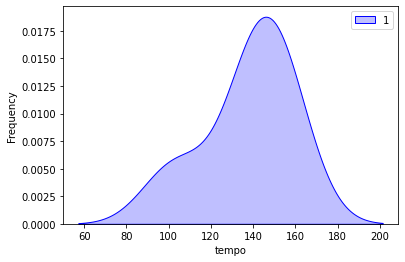

In [5]:
freq("tempo")

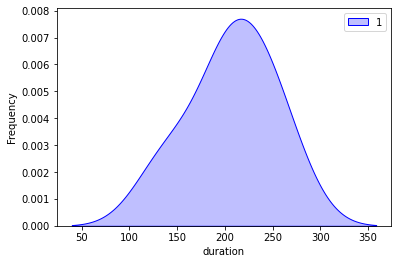

In [24]:
freq("duration")

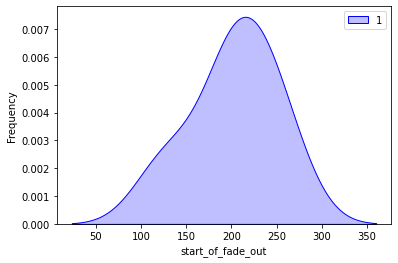

In [25]:
freq("start_of_fade_out")

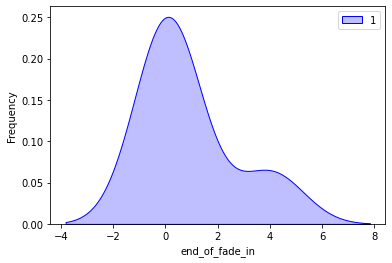

In [26]:
freq("end_of_fade_in")

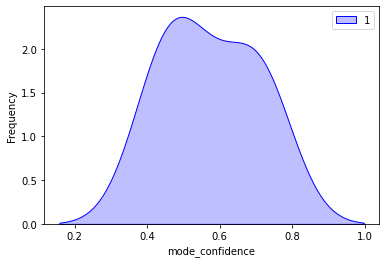

In [27]:
freq("mode_confidence")

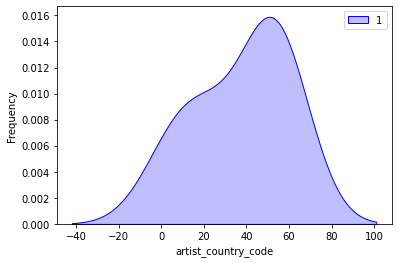

In [29]:
freq("artist_country_code")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19981 entries, 0 to 19999
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   analysis_sample_rate        19981 non-null  int32  
 1   artist_7digitalid           19981 non-null  int32  
 2   artist_familiarity          19981 non-null  float64
 3   artist_hotttnesss           19981 non-null  float64
 4   artist_id                   19981 non-null  int64  
 5   artist_latitude             19981 non-null  float64
 6   artist_location             19981 non-null  object 
 7   artist_longitude            19981 non-null  float64
 8   artist_mbid                 19981 non-null  object 
 9   artist_mbtags               19981 non-null  object 
 10  artist_mbtags_count         19981 non-null  object 
 11  artist_name                 19981 non-null  object 
 12  artist_playmeid             19981 non-null  int32  
 13  artist_terms                199

In [14]:
drop_list = ['artist_location', 'artist_latitude', 'artist_longitude','artist_name', 'release', 'title', 'artist_mbid', 'artist_mbtags', 'tatums_confidence', 'tatums_start']
train = data.drop(drop_list, axis=1)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19981 entries, 0 to 19999
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   analysis_sample_rate        19981 non-null  int32  
 1   artist_7digitalid           19981 non-null  int32  
 2   artist_familiarity          19981 non-null  float64
 3   artist_hotttnesss           19981 non-null  float64
 4   artist_id                   19981 non-null  int64  
 5   artist_mbtags_count         19981 non-null  object 
 6   artist_playmeid             19981 non-null  int32  
 7   artist_terms                19981 non-null  object 
 8   artist_terms_freq           19981 non-null  object 
 9   artist_terms_weight         19981 non-null  object 
 10  audio_md5                   19981 non-null  object 
 11  bars_confidence             19981 non-null  object 
 12  bars_start                  19981 non-null  object 
 13  beats_confidence            199

In [16]:
Y = copy.deepcopy(train.song_hotttnesss)
Y.shape

(19981,)

In [17]:
train["artist_familiarity"] = train["artist_familiarity"].fillna(train["artist_familiarity"].median())

In [18]:
train1 = train.drop("song_hotttnesss", axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(train1, Y, test_size=0.33, random_state=7)
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100.0}")

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [   0    1    2 ... 4808 4809 4810], got [0.         0.18970663 0.19238664 ... 0.99601169 0.99760392 1.        ]

In [20]:
#Function to evaluate my model with Cross validation
from sklearn.model_selection import cross_val_score
def testingModel(model, X_train, Y_train):
    scores = cross_val_score(model, X_train, Y_train, cv=10, scoring = "roc_auc")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    return scores.mean()

In [21]:
#61%
rf = RandomForestClassifier(n_estimators=100, oob_score = True)
rf.fit(train1, Y)
acc_random_forest = testingModel(rf, train1, Y)

/home/ylaguardia/code/puc-ai-ml/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


ValueError: setting an array element with a sequence.

In [11]:
#63%
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb1.fit(train1, Y)
acc_xgb = testingModel(xgb1, train1, Y)

Scores: [ 0.61899357  0.63935868  0.6591631   0.66604031  0.611862    0.67522582
  0.59946203  0.59170728  0.63769208  0.62461803]
Mean: 0.632412290476
Standard Deviation: 0.02676064386


In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(train1, Y)

acc_log = testingModel(logreg, train1, Y)

Scores: [ 0.58188611  0.624423    0.64767882  0.65642557  0.60638694  0.65019697
  0.58886483  0.6195309   0.57863009  0.61714095]
Mean: 0.617116417974
Standard Deviation: 0.026960071908


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(train1, Y)

acc_knn = testingModel(knn, train1, Y)

Scores: [ 0.51177639  0.59330306  0.53027022  0.50722536  0.54007574  0.5620046
  0.53808697  0.56188537  0.53357529  0.5486631 ]
Mean: 0.542686610812
Standard Deviation: 0.0241197399644


In [16]:
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(train1, Y)

acc_linear_svc = testingModel(linear_svc, train1, Y)

Scores: [ 0.49802308  0.58885736  0.56909165  0.48250174  0.47540515  0.62875457
  0.48459066  0.52271578  0.44768645  0.42871467]
Mean: 0.512634110759
Standard Deviation: 0.0609406125152


In [18]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train1, Y)

acc_decision_tree = testingModel(decision_tree, train1, Y)

Scores: [ 0.5137202   0.52015702  0.51126966  0.50957659  0.54080066  0.53954635
  0.51172751  0.53307452  0.51025382  0.5122183 ]
Mean: 0.520234462503
Standard Deviation: 0.0119725710081


In [20]:
from sklearn import linear_model
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
acc_sgd = testingModel(sgd, train1, Y)  

Scores: [ 0.54344495  0.53753311  0.59780234  0.42577667  0.47331623  0.40566011
  0.42131268  0.56578182  0.41832715  0.3783518 ]
Mean: 0.47673068438
Standard Deviation: 0.0738618373643


In [23]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'XGB', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_xgb, 
             acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

,Model
Score,
0.632412,XGB
0.617116,Logistic Regression
0.611623,Random Forest
0.542687,KNN
0.520234,Decision Tree
0.512634,Support Vector Machines


In [28]:
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27, n_threads=-1), 
 param_grid = params, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train1,Y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Users\phucd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.62340, std: 0.01655, params: {'colsample_bytree': 0.6, 'gamma': 0.3, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.6},
  mean: 0.62614, std: 0.01693, params: {'colsample_bytree': 0.6, 'gamma': 0.3, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.7},
  mean: 0.63621, std: 0.01855, params: {'colsample_bytree': 0.6, 'gamma': 0.3, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.8},
  mean: 0.63075, std: 0.01691, params: {'colsample_bytree': 0.6, 'gamma': 0.3, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 0.9},
  mean: 0.63782, std: 0.01729, params: {'colsample_bytree': 0.6, 'gamma': 0.3, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 1.0},
  mean: 0.62542, std: 0.01568, params: {'colsample_bytree': 0.6, 'gamma': 0.3, 'max_depth': 2, 'min_child_weight': 5, 'subsample': 0.6},
  mean: 0.62777, std: 0.01915, params: {'colsample_bytree': 0.6, 'gamma': 0.3, 'max_depth': 2, 'min_child_weight': 5, 'subsample': 0.7},
  mean: 0.63313, std: 0.01993, params: {'